1. How to import pandas and check the version?

In [2]:
import pandas as pd
print(f"1: Сurrent version: {pd.__version__}")
print("\n2:")
# pd.show_versions(as_json=False)
print("\n3:")
# !pip show pandas


1: Сurrent version: 2.2.2

2:

3:


---
2. How to create a series from a list, numpy array and dict?

Create a pandas series from each of the items below: a list, numpy and a dictionary

In [3]:
import numpy as np
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))

list2ser = pd.Series(mylist)
print(f"Series from the list:\n{list2ser}")

arr2ser = pd.Series(myarr)
# print(f"Series from the ndarray: {arr2ser}")

dict2ser = pd.Series(mydict)
# print(f"Series from the list: {dict2ser}")

Series from the list:
0     a
1     b
2     c
3     e
4     d
5     f
6     g
7     h
8     i
9     j
10    k
11    l
12    m
13    n
14    o
15    p
16    q
17    r
18    s
19    t
20    u
21    v
22    w
23    x
24    y
25    z
dtype: object


---
3. How to convert the index of a series into a column of a dataframe?

Difficulty Level: L1

Convert the series ser into a dataframe with its index as another column on the dataframe.

In [4]:
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))
ser = pd.Series(mydict)

df = ser.to_frame().reset_index()
df.head()

,index,0
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


---
4. How to combine many series to form a dataframe?

Difficulty Level: L1

Combine ser1 and ser2 to form a dataframe.

In [5]:
ser1 = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))
ser2 = pd.Series(np.arange(26))

df = pd.concat([ser1, ser2], axis=1)
df.head()

,0,1
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


---
5. How to assign name to the series’ index?

Difficulty Level: L1

Give a name to the series ser calling it ‘alphabets’.

In [6]:
ser = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))

ser.name = "alphabets"

ser.head()

0    a
1    b
2    c
3    e
4    d
Name: alphabets, dtype: object

---
6. How to get the items of series A not present in series B?

Difficulty Level: L2

From ser1 remove items present in ser2.

In [7]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

print("Elements not contained in ser2:")
ser1[~ser1.isin(ser2)]

Elements not contained in ser2:


0    1
1    2
2    3
dtype: int64

---
7. How to get the items not common to both series A and series B?

Difficulty Level: L2

Get all items of ser1 and ser2 not common to both.

In [8]:
import numpy as np
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

print("Symmetric difference with pandas:")
print(pd.concat([ser1[~ser1.isin(ser2)], ser2[~ser2.isin(ser1)]]))

print("Symmetric difference with numpy:")
print(np.setxor1d(ser1, ser2))

Symmetric difference with pandas:
0    1
1    2
2    3
2    6
3    7
4    8
dtype: int64
Symmetric difference with numpy:
[1 2 3 6 7 8]


---
8. How to get the minimum, 25th percentile, median, 75th, and max of a numeric series?

Difficuty Level: L2

Compute the minimum, 25th percentile, median, 75th, and maximum of ser.

Minimum: -2.6687567640337626
25th percentile: 7.91395264537079
Median: 11.103084913174937
25th percentile: 13.69214806460386
Maximum: 18.744772673690935


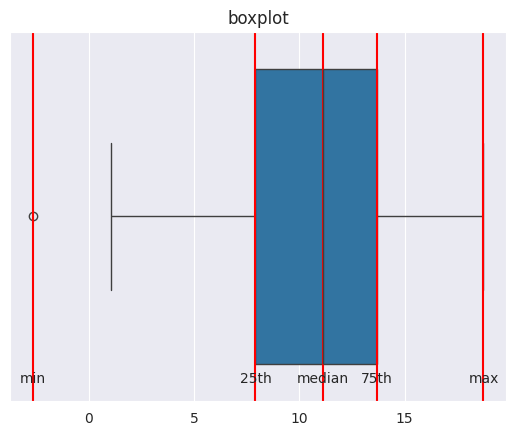

In [9]:
ser = pd.Series(np.random.normal(10, 5, 25))

print(f"Minimum: {ser.min()}")
print(f"25th percentile: {ser.quantile(0.25)}")
print(f"Median: {ser.median()}")
print(f"25th percentile: {ser.quantile(0.75)}")
print(f"Maximum: {ser.max()}")

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.boxplot(ser, orient="h")

lines = {
    "min": ser.min(),
    "25th": ser.quantile(0.25),
    "median": ser.median(),
    "75th": ser.quantile(0.75),
    "max": ser.max()
}

# Добавление вертикальных линий и текста
for label, value in lines.items():
    plt.axvline(value, color="red")
    plt.text(value, 0.45, label, ha='center')

plt.title("boxplot")
plt.show()

---
9. How to get frequency counts of unique items of a series?

Difficulty Level: L1

Calculte the frequency counts of each unique value ser.

In [10]:
ser = pd.Series(np.take(list('abcdefgh'), np.random.randint(8, size=30)))
print("Frequency counts:")
ser.value_counts()

Frequency counts:


e    6
f    5
a    5
g    3
h    3
c    3
b    3
d    2
Name: count, dtype: int64

---
10. How to keep only top 2 most frequent values as it is and replace everything else as ‘Other’?

Difficulty Level: L2

From ser, keep the top 2 most frequent items as it is and replace everything else as ‘Other’.

In [11]:
np.random.RandomState(100)
ser = pd.Series(np.random.randint(1, 5, [12]))

print(f"Top 2 frequency:")
print(count := ser.value_counts(sort=True, ascending=False)[:2])

ser  = ser.apply(lambda x: x if x in count else "Other")
ser.head()

Top 2 frequency:
2    4
4    4
Name: count, dtype: int64


0        2
1    Other
2        4
3    Other
4        2
dtype: object

---
11. How to bin a numeric series to 10 groups of equal size?

Difficulty Level: L2

Bin the series ser into 10 equal deciles and replace the values with the bin name.


In [12]:
ser = pd.Series(np.random.random(20))
pd.cut(ser, bins=10, labels=[f"{i}th" for i in range(1, 11)]).head()

0    10th
1     2th
2     6th
3     6th
4     5th
dtype: category
Categories (10, object): ['1th' < '2th' < '3th' < '4th' ... '7th' < '8th' < '9th' < '10th']

---
12. How to convert a numpy array to a dataframe of given shape? (L1)

Difficulty Level: L1

Reshape the series ser into a dataframe with 7 rows and 5 columns

In [13]:
ser = pd.Series(np.random.randint(1, 10, 35))

df = pd.DataFrame(ser.to_numpy().reshape((5, 7)))

df.head()

,0,1,2,3,4,5,6
0,4,9,9,8,5,4,9
1,6,3,8,7,9,3,8
2,6,8,4,6,2,4,6
3,4,9,5,8,8,8,5
4,5,3,9,9,3,5,1


----
13. How to find the positions of numbers that are multiples of 3 from a series?

Difficulty Level: L2

Find the positions of numbers that are multiples of 3 from ser.

In [14]:
ser = pd.Series(np.random.randint(1, 10, 7))

print(f"positions of numbers that are multiples of 3: {ser[ser % 3 == 0].index}")

positions of numbers that are multiples of 3: Index([2, 4, 6], dtype='int64')


---
14. How to extract items at given positions from a series

Difficulty Level: L1

From ser, extract the items at positions in list pos.

In [15]:
ser = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
pos = [0, 4, 8, 14, 20]

print(f"Elements in positions: {pos}")
ser[pos]

Elements in positions: [0, 4, 8, 14, 20]


0     a
4     e
8     i
14    o
20    u
dtype: object

---
15. How to stack two series vertically and horizontally ?

Difficulty Level: L1

Stack ser1 and ser2 vertically and horizontally (to form a dataframe).

In [16]:
ser1 = pd.Series(range(5))
ser2 = pd.Series(list('abcde'))

pd.concat([ser1, ser2], axis=1)
# pd.concat([ser1, ser2], axis=0)

,0,1
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


---
16. How to get the positions of items of series A in another series B?

Difficulty Level: L2

Get the positions of items of ser2 in ser1 as a list.

In [17]:
ser1 = pd.Series([10, 9, 6, 5, 3, 1, 12, 8, 13])
ser2 = pd.Series([1, 3, 10, 13])
print(f"Index: {ser1[ser1.isin(ser2)].index.to_list()}")

Index: [0, 4, 5, 8]


---
17. How to compute the mean squared error on a truth and predicted series?

Difficulty Level: L2

Compute the mean squared error of truth and pred series.

In [18]:
truth = pd.Series(range(10))
pred = pd.Series(range(10)) + np.random.random(10)


print(f"mean squared error of truth and pred: {((truth-pred)**2).mean()}")

mean squared error of truth and pred: 0.2985627286560807


---
18. How to convert the first character of each element in a series to uppercase?

Difficulty Level: L2

Change the first character of each word to upper case in each word of ser.

In [19]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])

print("Title:")

ser.str.title()

Title:


0     How
1      To
2    Kick
3    Ass?
dtype: object

---
19. How to calculate the number of characters in each word in a series?

Difficulty Level: L2

In [20]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])
print("Length:")
ser.str.len()

Length:


0    3
1    2
2    4
3    4
dtype: int64

---
20. How to compute difference of differences between consequtive numbers of a series?

Difficulty Level: L1

Difference of differences between the consequtive numbers of ser.

In [21]:
ser = pd.Series([1, 3, 6, 10, 15, 21, 27, 35])

print(ser.diff().tolist())
print(ser.diff().diff().tolist())


[nan, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0, 8.0]
[nan, nan, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0]


---
21. How to convert a series of date-strings to a timeseries?

Difficiulty Level: L2

In [22]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])
ser = ser.astype("datetime64[ns]")
ser

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

---
22. How to get the day of month, week number, day of year and day of week from a series of date strings?

Difficiulty Level: L2

Get the day of month, week number, day of year and day of week from ser.

In [23]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])
ser = ser.astype("datetime64[ns]")
print(f"Day:\n{ser.dt.day.to_list()}")
print(f"Week:\n{ser.dt.isocalendar().week.to_list()}")
print(f"Day of year:\n{ser.dt.day_of_year.to_list()}")
print(f"Day of week:\n{ser.dt.day_name().to_list()}")

Day:
[1, 2, 3, 4, 5, 6]
Week:
[53, 5, 9, 14, 19, 23]
Day of year:
[1, 33, 63, 94, 125, 157]
Day of week:
['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Monday', 'Saturday']


---
23. How to convert year-month string to dates corresponding to the 4th day of the month?

Difficiulty Level: L2

Change ser to dates that start with 4th of the respective months.

In [24]:
ser = pd.Series(['Jan 2010', 'Feb 2011', 'Mar 2012'])
ser = pd.to_datetime(ser + " 4", format="%b %Y %d")
ser

0   2010-01-04
1   2011-02-04
2   2012-03-04
dtype: datetime64[ns]

---
24. How to filter words that contain atleast 2 vowels from a series?

Difficiulty Level: L3

From ser, extract words that contain atleast 2 vowels.

In [25]:
ser = pd.Series(['Apple', 'Orange', 'Plan', 'Python', 'Money'])
import re
ser[ser.isin([el for el in ser if re.findall(r"[aeiou]", el.lower()).__len__() >= 2])]


0     Apple
1    Orange
4     Money
dtype: object

---
25. How to filter valid emails from a series?

Difficiulty Level: L3

Extract the valid emails from the series emails. The regex pattern for valid emails is provided as reference.

In [26]:
emails = pd.Series(['buying books at amazom.com', 'rameses@egypt.com', 'matt@t.co', 'narendra@modi.com'])
pattern ='[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\\.[A-Za-z]{2,4}'

print("Valid email:")
emails[emails.str.contains(pattern, regex=True)]

Valid email:


1    rameses@egypt.com
2            matt@t.co
3    narendra@modi.com
dtype: object

---
26. How to get the mean of a series grouped by another series?

Difficiulty Level: L2

Compute the mean of weights of each fruit.

In [45]:
fruit = pd.Series(np.random.choice(['apple', 'banana', 'carrot'], 10))
weights = pd.Series(np.linspace(1, 10, 10))
print(f"Weights: {weights.tolist()}")
print(f"Fruit: {fruit.tolist()}")

df = pd.concat([fruit, weights], axis=1).groupby(by=0, sort=True).mean()

df


Weights: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
Fruit: ['apple', 'carrot', 'apple', 'apple', 'banana', 'carrot', 'apple', 'apple', 'apple', 'apple']


,1
0,
apple,6.0
banana,5.0
carrot,4.0


---
27. How to compute the euclidean distance between two series?

Difficiulty Level: L2

Compute the euclidean distance between series (points) p and q, without using a packaged formula.

In [52]:
p = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
q = pd.Series([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

import scipy.spatial.distance as ssd

print(f"1 SciPy: {ssd.euclidean(p, q)}")
print(f"2 NumPy: {np.linalg.norm(p - q)}")
print(f"3: {sum((p - q)**2)**(1/2)}")


1 SciPy: 18.16590212458495
2 NumPy: 18.16590212458495
3: 18.16590212458495


---
28. How to find all the local maxima (or peaks) in a numeric series?

Difficiulty Level: L3

Get the positions of peaks (values surrounded by smaller values on both sides) in ser.

In [121]:
ser = pd.Series([2, 10, 3, 4, 9, 10, 2, 7, 3])

In [122]:
%%timeit -r 3 -n 10000

padding = np.concatenate([[0], ser.values, [0]])

condition = (padding[:-2] < padding[1:-1]) & (padding[1:-1] > padding[2:])

np.where(condition)[0]  

8.71 µs ± 1.52 µs per loop (mean ± std. dev. of 3 runs, 10,000 loops each)


In [123]:
%%timeit -r 3 -n 10000

dd = np.diff(np.sign(np.diff(ser)))
np.where(dd == -2)[0] + 1


26.1 µs ± 1.46 µs per loop (mean ± std. dev. of 3 runs, 10,000 loops each)


---
29. How to replace missing spaces in a string with the least frequent character?

Replace the spaces in my_str with the least frequent character.

Difficiulty Level: L2

In [147]:
my_str = 'dbc deb abed gade'
ser = pd.Series(list(my_str))
letter = sorted(ser.value_counts().to_dict().items(), key=lambda item: (item[1], item[0]))[0][0]
print(my_str.replace(" ", letter))

dbccdebcabedcgade


---
30. How to create a TimeSeries starting ‘2000-01-01’ and 10 weekends (saturdays) after that having random numbers as values?

Difficiulty Level: L2

In [154]:
ser = pd.Series(np.random.randint(0, 20, size=10), index=pd.date_range(start="2000-01-01", periods=10, freq="7D"))
ser

2000-01-01     2
2000-01-08    19
2000-01-15     0
2000-01-22    17
2000-01-29    14
2000-02-05    18
2000-02-12    17
2000-02-19    15
2000-02-26     1
2000-03-04     7
Freq: 7D, dtype: int64

---
31. How to fill an intermittent time series so all missing dates show up with values of previous non-missing date?

Difficiulty Level: L2

ser has missing dates and values. Make all missing dates appear and fill up with value from previous date.

In [173]:
ser = pd.Series([1,10,3,np.nan], index=pd.to_datetime(['2000-01-01', '2000-01-03', '2000-01-06', '2000-01-08']))
print(ser)

# new = pd.Series(ser, pd.date_range(ser.index.min(), ser.index.max()))
# new.ffill()

ser.resample("D").ffill()

2000-01-01     1.0
2000-01-03    10.0
2000-01-06     3.0
2000-01-08     NaN
dtype: float64


2000-01-01     1.0
2000-01-02     1.0
2000-01-03    10.0
2000-01-04    10.0
2000-01-05    10.0
2000-01-06     3.0
2000-01-07     3.0
2000-01-08     NaN
Freq: D, dtype: float64

---
32. How to compute the autocorrelations of a numeric series?

Difficiulty Level: L3

Compute autocorrelations for the first 10 lags of ser. Find out which lag has the largest correlation.

In [177]:
ser = pd.Series(np.arange(20) + np.random.normal(1, 10, 20))

autocorrelations = [ser.autocorr(i).round(2) for i in range(11)]
print(autocorrelations[1:])
print('Lag having highest correlation: ', np.argmax(np.abs(autocorrelations[1:]))+1)

[np.float64(-0.08), np.float64(-0.09), np.float64(-0.08), np.float64(-0.05), np.float64(-0.33), np.float64(0.53), np.float64(-0.17), np.float64(-0.12), np.float64(0.24), np.float64(0.69)]
Lag having highest correlation:  10


---
33. How to import only every nth row from a csv file to create a dataframe?

Difficiulty Level: L2

Import every 50th row of BostonHousing dataset as a dataframe.

In [182]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv', chunksize=50)
df2 = pd.concat([chunk.iloc[0] for chunk in df], axis=1)
df2 = df2.transpose()
df2.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
100,0.14866,0.0,8.56,0.0,0.520,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42,27.5
150,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9


---
34. How to change column values when importing csv to a dataframe?

Difficulty Level: L2

Import the boston housing dataset, but while importing change the 'medv' (median house value) column so that values < 25 becomes ‘Low’ and > 25 becomes ‘High’.

In [185]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv', converters={"medv" : lambda x: "Low" if float(x) < 25 else "High"})

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,Low
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,Low
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,High
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,High
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,High


---
35. How to create a dataframe with rows as strides from a given series?

Difficiulty Level: L3

In [186]:
L = pd.Series(range(15))

def gen_strides(a, stride_len=5, window_len=5):
    n_strides = ((a.size-window_len)//stride_len) + 1
    return np.array([a[s:(s+window_len)] for s in np.arange(0, a.size, stride_len)[:n_strides]])

gen_strides(L, stride_len=2, window_len=4)

array([[ 0,  1,  2,  3],
       [ 2,  3,  4,  5],
       [ 4,  5,  6,  7],
       [ 6,  7,  8,  9],
       [ 8,  9, 10, 11],
       [10, 11, 12, 13]])

---
36. How to import only specified columns from a csv file?

Difficulty Level: L1

Import ‘crim’ and ‘medv’ columns of the BostonHousing dataset as a dataframe.

In [187]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv', usecols=["crim", "medv"])

df.head()

,crim,medv
0,0.00632,24.0
1,0.02731,21.6
2,0.02729,34.7
3,0.03237,33.4
4,0.06905,36.2


---
37. How to get the nrows, ncolumns, datatype, summary stats of each column of a dataframe? Also get the array and list equivalent.

Difficulty Level: L2

Get the number of rows, columns, datatype and summary statistics of each column of the Cars93 dataset. Also get the numpy array and list equivalent of the dataframe.

In [194]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv")
print(f"Shape: {df.shape}")
print(f"Dtypes: {df.info()}")
print(f"Statistics: {df.describe()}")
# numpy array 
df_arr = df.values

# list
df_list = df.values.tolist()


Shape: (93, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        89 non-null     object 
 1   Model               92 non-null     object 
 2   Type                90 non-null     object 
 3   Min.Price           86 non-null     float64
 4   Price               91 non-null     float64
 5   Max.Price           88 non-null     float64
 6   MPG.city            84 non-null     float64
 7   MPG.highway         91 non-null     float64
 8   AirBags             55 non-null     object 
 9   DriveTrain          86 non-null     object 
 10  Cylinders           88 non-null     object 
 11  EngineSize          91 non-null     float64
 12  Horsepower          86 non-null     float64
 13  RPM                 90 non-null     float64
 14  Rev.per.mile        87 non-null     float64
 15  Man.trans.avail     88 non-null     object 

---
38. How to extract the row and column number of a particular cell with given criterion?

Difficulty Level: L1

Which manufacturer, model and type has the highest Price? What is the row and column number of the cell with the highest Price value?

In [196]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

df[df["Price"] == df["Price"].max()].loc[:, ["Manufacturer",	"Model"]]

,Manufacturer,Model
58,Mercedes-Benz,300E


---
39. How to rename a specific columns in a dataframe?

Difficulty Level: L2

Rename the column Type as CarType in df and replace the ‘.’ in column names with ‘_’.

In [205]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
print(df.columns)

df.rename(columns={"Type": "CarType"}, inplace=True)
df.columns = df.columns.str.replace(".", "_")

print(df.columns)

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')
Index(['Manufacturer', 'Model', 'CarType', 'Min_Price', 'Price', 'Max_Price',
       'MPG_city', 'MPG_highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev_per_mile', 'Man_trans_avail',
       'Fuel_tank_capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn_circle', 'Rear_seat_room', 'Luggage_room', 'Weight', 'Origin',
       'Make'],
      dtype='object')


----
40. How to check if a dataframe has any missing values?

Difficulty Level: L1

Check if df has any missing values.

In [206]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

df.isna().sum()

Manufacturer           4
Model                  1
Type                   3
Min.Price              7
Price                  2
Max.Price              5
MPG.city               9
MPG.highway            2
AirBags               38
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64

---
41. How to count the number of missing values in each column?

Difficulty Level: L2

Count the number of missing values in each column of df. Which column has the maximum number of missing values?

In [207]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

df.isna().sum()

Manufacturer           4
Model                  1
Type                   3
Min.Price              7
Price                  2
Max.Price              5
MPG.city               9
MPG.highway            2
AirBags               38
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64

---
42. How to replace missing values of multiple numeric columns with the mean?

Difficulty Level: L2

Replace missing values in Min.Price and Max.Price columns with their respective mean.

In [211]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

df["Min.Price"] = df["Min.Price"].fillna(df["Min.Price"].mean())
df["Max.Price"] = df["Max.Price"].fillna(df["Min.Price"].mean())



---
43. How to use apply function on existing columns with global variables as additional arguments?

Difficulty Level: L3

In df, use apply method to replace the missing values in Min.Price with the column’s mean and those in Max.Price with the column’s median.

In [212]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
d = {'Min.Price': np.nanmean, 'Max.Price': np.nanmedian}
df[['Min.Price', 'Max.Price']] = df[['Min.Price', 'Max.Price']].apply(lambda x, d: x.fillna(d[x.name](x)), args=(d, ))

---
44. How to select a specific column from a dataframe as a dataframe instead of a series?

Difficulty Level: L2

Get the first column (a) in df as a dataframe (rather than as a Series).


In [214]:
df = pd.DataFrame(np.arange(20).reshape(-1, 5), columns=list('abcde'))

df[["a"]]

,a
0,0
1,5
2,10
3,15


---
45. How to change the order of columns of a dataframe?

Difficulty Level: L3

Actually 3 questions.

    In df, interchange columns 'a' and 'c'.

    Create a generic function to interchange two columns, without hardcoding column names.

    Sort the columns in reverse alphabetical order, that is colume 'e' first through column 'a' last.


In [228]:
df = pd.DataFrame(np.arange(20).reshape(-1, 5), columns=list('abcde'))

def swap_columns(df, a, b):
    temp = df.columns.to_list()
    temp[df.columns.to_list().index(a)] = b 
    temp[df.columns.to_list().index(b)] = a
    return df.reindex(columns=temp)

df = swap_columns(df, "a", "c")

df.sort_index(axis=1, inplace=True)

df.head()

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
